In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium import Map, Marker

In [2]:
df = pd.read_csv(r"D:\INTERNSHIPS\RTA Dataset.csv\RTA Dataset.csv")

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
# Check for missing values in the relevant columns
# Adjust the column names based on what is displayed above
required_columns = ['ROAD_CONDITION', 'WEATHER_CONDITION', 'TIME']

In [9]:
# Check if the required columns exist in the DataFrame
for col in required_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in the DataFrame.")

Column 'ROAD_CONDITION' not found in the DataFrame.
Column 'WEATHER_CONDITION' not found in the DataFrame.
Column 'TIME' not found in the DataFrame.


In [10]:
# Drop rows with essential missing values, only if columns exist
existing_columns = [col for col in required_columns if col in df.columns]
df.dropna(subset=existing_columns, inplace=True)

In [12]:
if 'TIME' in df.columns:
    # If the TIME column exists, convert it to datetime
    df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M').dt.hour
else:
    print("Column 'TIME' not found in the DataFrame. Please check the column names.")

Column 'TIME' not found in the DataFrame. Please check the column names.


In [13]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [16]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

In [17]:
print("\nCleaned Dataset:")
df.head()


Cleaned Dataset:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [21]:
road_condition_counts = df['Road_surface_conditions'].value_counts()

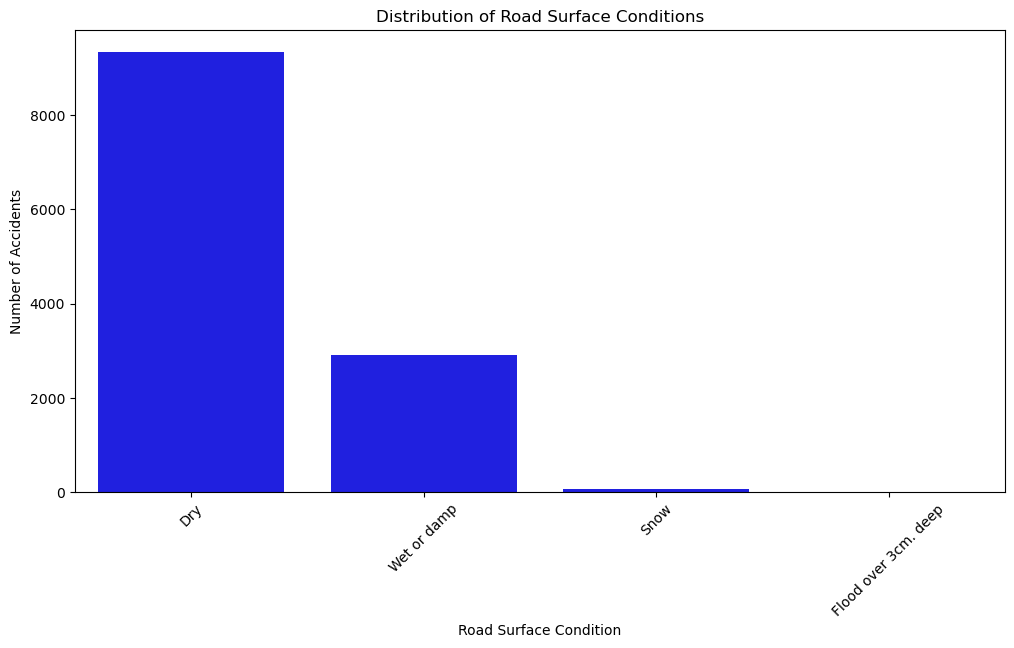

In [24]:
if 'Road_surface_conditions' in df.columns:
    road_surface_counts = df['Road_surface_conditions'].value_counts()
    
    # Plotting the distribution of road surface conditions
    plt.figure(figsize=(12, 6))
    sns.barplot(x=road_surface_counts.index, y=road_surface_counts.values, color='blue')  # Using a solid color
    plt.title('Distribution of Road Surface Conditions')
    plt.xlabel('Road Surface Condition')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Road_surface_conditions' not found in the DataFrame. Please check the column names.")

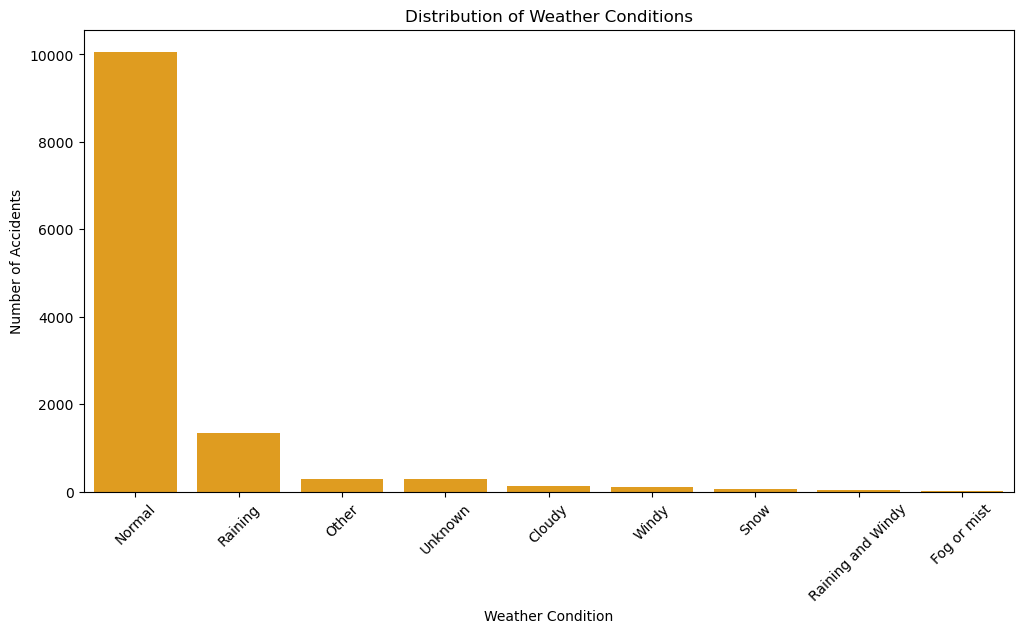

In [27]:
# Analyzing the distribution of weather conditions
if 'Weather_conditions' in df.columns:
    weather_condition_counts = df['Weather_conditions'].value_counts()

    # Plotting the distribution of weather conditions
    plt.figure(figsize=(12, 6))
    sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values, color='orange')  # Using a solid color
    plt.title('Distribution of Weather Conditions')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Weather_conditions' not found in the DataFrame. Please check the column names.")

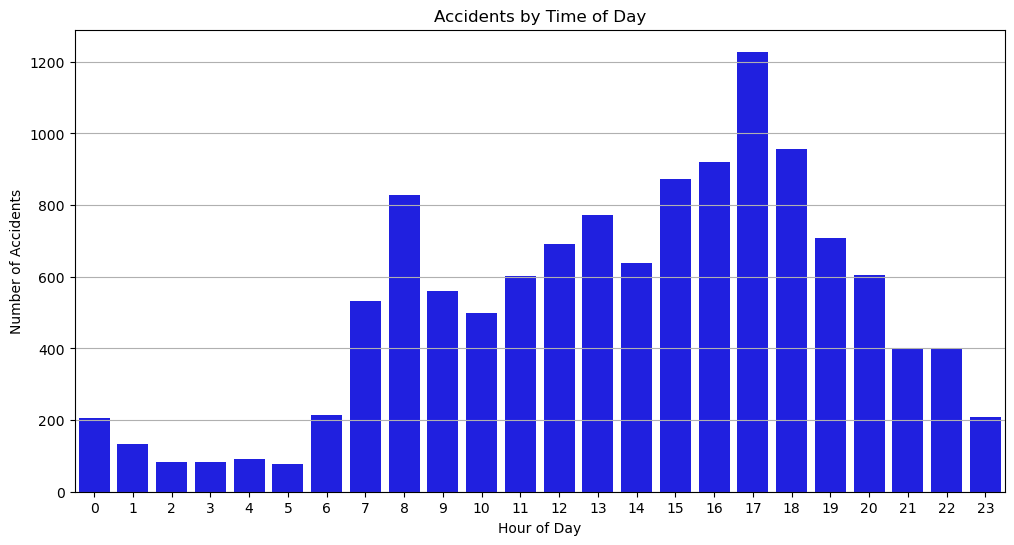

In [30]:
# Analyzing accidents by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=df, color='blue')  # Using 'Time' with the 'color' parameter
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

In [34]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [35]:
df.dropna(subset=['Area_accident_occured'], inplace=True)


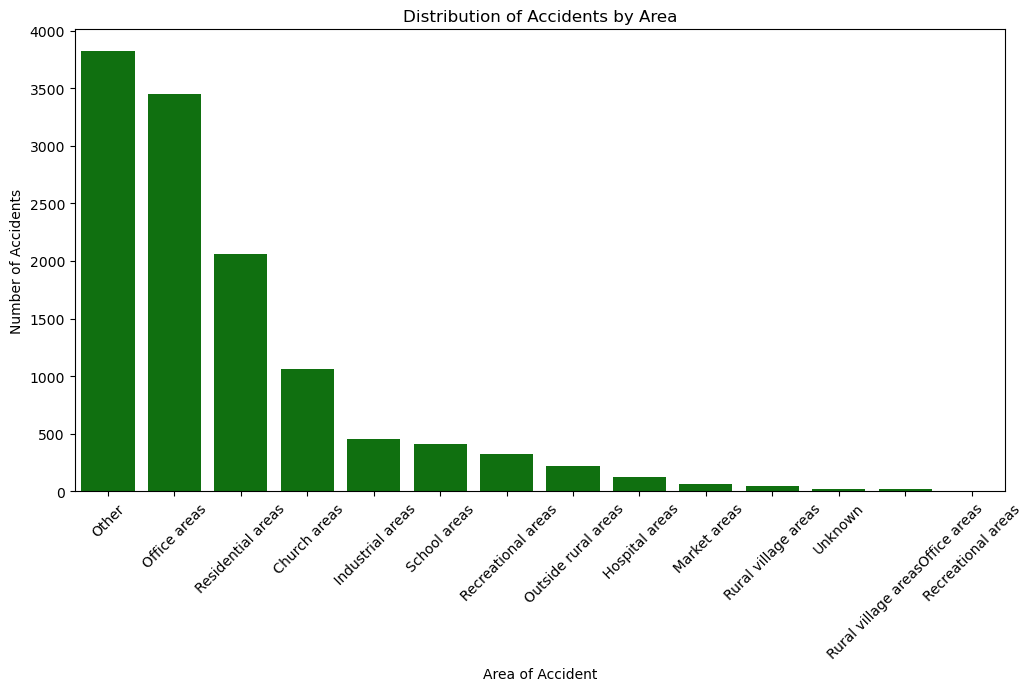

In [36]:
if 'Area_accident_occured' in df.columns:
    area_counts = df['Area_accident_occured'].value_counts()

    # Plotting the distribution of accidents by area
    plt.figure(figsize=(12, 6))
    sns.barplot(x=area_counts.index, y=area_counts.values, color='green')  # Using a solid color
    plt.title('Distribution of Accidents by Area')
    plt.xlabel('Area of Accident')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Area_accident_occured' not found in the DataFrame. Please check the column names.")

In [39]:
map_center = [0, 0]  # Replace with appropriate center if you have any geo-coordinates
accident_map = folium.Map(location=map_center, zoom_start=2)

In [44]:
for area, count in area_counts.items():
    folium.Marker(location=[map_center[0], map_center[1]], 
                  popup=f'{area}: {count} accidents').add_to(accident_map)

In [45]:
# Save the map as an HTML file
accident_map.save('accident_map.html')  # Save the map for viewing in a browser
print("Accident map saved as 'accident_map.html'.")

# Display the map (in Jupyter Notebook)
accident_map  # This will render the map in Jupyter Notebook

Accident map saved as 'accident_map.html'.
